findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimMei
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23637 (\N{CJK UNIFIED IDEOGRAPH-5C55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24335 (\N{CJK UNIFIED IDEOGRAPH-5F0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Gly

[-2.         -1.8        -1.6        -1.4        -1.2        -1.
 -0.8        -0.6        -0.4        -0.2         0.          0.10526316
  0.21052632  0.31578947  0.42105263  0.52631579  0.63157895  0.73684211
  0.84210526  0.94736842  1.05263158  1.15789474  1.26315789  1.36842105
  1.47368421  1.57894737  1.68421053  1.78947368  1.89473684  2.        ]
e^ -2.0  =  0.13533528323661267 (近似值)	 0.1353352832366127 (真实值)
e^ -1.8  =  0.16529888822158215 (近似值)	 0.16529888822158653 (真实值)
e^ -1.6  =  0.20189651799465555 (近似值)	 0.20189651799465538 (真实值)
e^ -1.4  =  0.2465969639416065 (近似值)	 0.2465969639416065 (真实值)
e^ -1.2  =  0.301194211912202 (近似值)	 0.30119421191220214 (真实值)
e^ -1.0  =  0.36787944117145815 (近似值)	 0.36787944117144233 (真实值)
e^ -0.7999999999999998  =  0.4493289641172216 (近似值)	 0.4493289641172217 (真实值)
e^ -0.5999999999999999  =  0.5488116360940265 (近似值)	 0.5488116360940265 (真实值)
e^ -0.3999999999999999  =  0.6703200460356091 (近似值)	 0.6703200460356393 (真实值)
e^ -0.19999999999999996

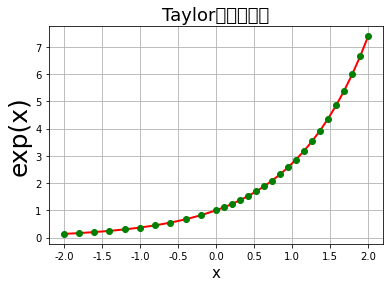

In [8]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

def calc_e_small(x):
    n = 10
    f = np.arange(1, n+1).cumprod()
    b = np.array([x]*n).cumprod()
    return np.sum(b / f) +1

def calc_e(x):
    reverse = False
    if x < 0:
        x = -x
        reverse = True
    ln2 = 0.69314718055994530941723212145818
    c = x / ln2
    a = int(c + 0.5)
    b = x - a * ln2
    y = (2 ** a) * calc_e_small(b)
    if reverse:
        return 1/y
    return y

if __name__ == '__main__':
    t1 = np.linspace(-2, 0, 10, endpoint=False)
    t2 = np.linspace(0, 2, 20)
    t = np.concatenate((t1, t2))
    print(t)
    y = np.empty_like(t)
    for i, x in enumerate(t):
        y[i] = calc_e(x)
        print('e^', x, ' = ', y[i], '(近似值)\t', math.exp(x), '(真实值)')
    mpl.rcParams['font.sans-serif'] = [u'SimMei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.plot(t, y, 'r-', t, y, 'go', linewidth=2)
    plt.title(u'Taylor展式的应用', fontsize=18)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('exp(x)', fontsize=25)
    plt.grid(True)
    plt.show()
